# Extracción de datos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from bootcampviztools import pinta_distribucion_categoricas, bubble_plot, grafico_dispersion_con_correlacion, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, card_tipo
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


In [4]:
df = pd.read_csv("../data/habitos/student_habits_performance.csv")


In [5]:
len(df.student_id) # Hay 1000 alumnos

1000

In [342]:
df.duplicated().sum() # NO HAY DUPLICADOS

np.int64(0)

In [343]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [344]:
df.isnull().mean()*100 # Comprobamos que no haya nulos, HAY NULOS

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [345]:
df.parental_education_level.unique() # Veo los nulos

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [346]:
education_parental_mode = df.parental_education_level.mode()[0]
education_parental_mode

'High School'

In [347]:
# Relleno los vacios con la moda de la educación de los padres
df.parental_education_level.fillna(education_parental_mode, inplace=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_23897/2901038918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.parental_education_level.fillna(education_parental_mode, inplace=True)


In [348]:
df.isnull().mean()*100 # Comprobamos que no haya nulos

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

# YA LIMPIOS LOS DATOS

In [349]:
card_tipo(df) # MIRO LA CARDINALIDAD PARA EL ID

,Card,%_Card,Tipo,tipo_sugerido
student_id,1000,100.0,object,Numerica continua
age,8,0.8,int64,Numerica discreta
gender,3,0.3,object,Categorica
study_hours_per_day,78,7.8,float64,Numerica discreta
social_media_hours,60,6.0,float64,Numerica discreta
netflix_hours,51,5.1,float64,Numerica discreta
part_time_job,2,0.2,object,Binaria
attendance_percentage,320,32.0,float64,Numerica continua
sleep_hours,68,6.8,float64,Numerica discreta
diet_quality,3,0.3,object,Categorica


In [350]:
df.set_index("student_id", inplace=True)
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


# QUITAR COLUMNS

In [351]:
df.internet_quality.value_counts(normalize=True)*100 # >80% tiene buen internet

internet_quality
Good       44.7
Average    39.1
Poor       16.2
Name: proportion, dtype: float64

In [352]:
df.drop(["parental_education_level", "extracurricular_participation", "internet_quality"], axis = 1, inplace=True)

In [ ]:
# Truncar datos
df["study_hours_per_day"] = df.study_hours_per_day.astype(int)
df["sleep_hours"] = df.sleep_hours.astype(int)

In [354]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
age,8,0.8,int64,Numerica discreta
gender,3,0.3,object,Categorica
study_hours_per_day,9,0.9,int64,Numerica discreta
social_media_hours,60,6.0,float64,Numerica discreta
netflix_hours,51,5.1,float64,Numerica discreta
part_time_job,2,0.2,object,Binaria
attendance_percentage,320,32.0,float64,Numerica continua
sleep_hours,8,0.8,int64,Numerica discreta
diet_quality,3,0.3,object,Categorica
exercise_frequency,7,0.7,int64,Numerica discreta


# EDAD

In [355]:
df.age.unique() # Hay gente de edades entre 17 - 24

array([23, 20, 21, 19, 24, 18, 22, 17])

# GÉNERO

In [356]:
df.gender.unique() # En el género hay hombre mujer u otro

array(['Female', 'Male', 'Other'], dtype=object)

In [357]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score
student_id,,,,,,,,,,,,
S1000,23,Female,0,1.2,1.1,No,85.0,8,Fair,6,8,56.2
S1001,20,Female,6,2.8,2.3,No,97.3,4,Good,6,8,100.0
S1002,21,Male,1,3.1,1.3,No,94.8,8,Poor,1,1,34.3
S1003,23,Female,1,3.9,1.0,No,71.0,9,Poor,4,1,26.8
S1004,19,Female,5,4.4,0.5,No,90.9,4,Fair,3,1,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,0.5,1.6,No,77.0,7,Fair,2,6,76.1
S1996,17,Female,2,1.0,2.4,Yes,86.0,6,Poor,1,6,65.9
S1997,20,Male,3,2.6,1.3,No,61.9,6,Good,5,9,64.4


# HORAS DE ESTUDIO

In [358]:
df.study_hours_per_day.unique()

array([0, 6, 1, 5, 7, 4, 3, 2, 8])

In [359]:
df.study_hours_per_day.min()

np.int64(0)

In [360]:
df.study_hours_per_day.max()

np.int64(8)

# MEDIA DE HORAS DE ESTUDIO

In [361]:
df.study_hours_per_day.mean() # De media los estudiantes dedican 3 horas y media

np.float64(3.113)

In [362]:
df.study_hours_per_day.min() # 0.0
df.study_hours_per_day.max() # 8.3


np.int64(8)

# NOTA DEL QUE ESTUDIA MÁS, DEL QUE ESTUDIA MENOS

In [363]:
mask1 = df.study_hours_per_day == 0.0 
mask2 = df.study_hours_per_day == 8.3

poco_estudiar = df[mask1]
mucho_estudiar = df[mask2]
mucho_estudiar

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score
student_id,,,,,,,,,,,,


# HACE FALTA TANTO ESTUDAIAR PARA TENER UN 100¿?¿?¿?¿

In [364]:
mask1 = df.exam_score == 100.0

sobresaliente = df[mask1]

sobresaliente.study_hours_per_day.mean() # 6 horas más o menos

sobresaliente[["age", "gender", "study_hours_per_day", "exam_score"]].describe()


,age,study_hours_per_day,exam_score
count,48.000000,48.000000,48.0
mean,20.791667,5.812500,100.0
std,2.113365,0.914569,0.0
min,17.000000,4.000000,100.0
25%,19.000000,5.000000,100.0
50%,21.000000,6.000000,100.0
75%,23.000000,6.000000,100.0
max,24.000000,8.000000,100.0


# MEDIA HORAS DE ESTUDIO POR GÉNERO

In [365]:
mask = df["gender"] == "Male"
df.groupby(mask)[["study_hours_per_day"]].mean() # Un hombre de media al día estudia 3 h y media 

,study_hours_per_day
gender,
False,3.145315
True,3.077568


In [366]:
mask = df["gender"] == "Female"
df.groupby(mask)[["study_hours_per_day"]].mean() # Una mujer de media estudia un poco más que un hombre, es decir, poco más que 3 h y media.

,study_hours_per_day
gender,
False,3.082852
True,3.145530


In [367]:
mask = df["gender"] == "Other"
df.groupby(mask)[["study_hours_per_day"]].mean() # El resto de media estudia un poco más que hombre y mujer.

,study_hours_per_day
gender,
False,3.111691
True,3.142857


# NOTA MEDIA POR GÉNERO

In [368]:
df.groupby("gender")[["exam_score"]].mean() # La media de nota por género

,exam_score
gender,
Female,69.741372
Male,69.368344
Other,70.647619


# CREAMOS COLUMNA DEL TIEMPO DE OCIO AL DÍA

In [369]:
df["ocio_al_dia"] = df.netflix_hours + df.social_media_hours

In [370]:
# DROPEAMOS LAS COLUMNAS QUE HEMOS JUNTADO PARA QUE NO HAYA MUCHAS
df.drop(["netflix_hours", "social_media_hours"], axis=1, inplace=True)

In [312]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia
student_id,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,8,56.2,2.3
S1001,20,Female,6,No,97.3,4,Good,6,8,100.0,5.1
S1002,21,Male,1,No,94.8,8,Poor,1,1,34.3,4.4
S1003,23,Female,1,No,71.0,9,Poor,4,1,26.8,4.9
S1004,19,Female,5,No,90.9,4,Fair,3,1,66.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,6,76.1,2.1
S1996,17,Female,2,Yes,86.0,6,Poor,1,6,65.9,3.4
S1997,20,Male,3,No,61.9,6,Good,5,9,64.4,3.9


In [377]:
df["ocio_al_dia"] = df.ocio_al_dia.astype(int)
df.groupby("ocio_al_dia")["ocio_al_dia"].value_counts()

ocio_al_dia
0      16
1      62
2     111
3     222
4     243
5     196
6     100
7      37
8      10
9       2
10      1
Name: count, dtype: int64

In [382]:
df["age"] = df.age.astype(int)
df.groupby("age")["age"].value_counts()

age
17    133
18    117
19    113
20    146
21    125
22    113
23    119
24    134
Name: count, dtype: int64

In [380]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia
student_id,,,,,,,,,,,
S1000,2,Female,0,No,85.0,8,Fair,6,8,56.2,2
S1001,5,Female,6,No,97.3,4,Good,6,8,100.0,5
S1002,4,Male,1,No,94.8,8,Poor,1,1,34.3,4
S1003,4,Female,1,No,71.0,9,Poor,4,1,26.8,4
S1004,4,Female,5,No,90.9,4,Fair,3,1,66.4,4
...,...,...,...,...,...,...,...,...,...,...,...
S1995,2,Female,2,No,77.0,7,Fair,2,6,76.1,2
S1996,3,Female,2,Yes,86.0,6,Poor,1,6,65.9,3
S1997,3,Male,3,No,61.9,6,Good,5,9,64.4,3


# CUÁTOS TIENEN TRABAJO

In [313]:
df.groupby("gender")[["part_time_job"]].value_counts(normalize=True)*100 # Cuantos tienen y no trabajo a tiempo partido

gender  part_time_job
Female  No               80.041580
        Yes              19.958420
Male    No               77.148847
        Yes              22.851153
Other   No               76.190476
        Yes              23.809524
Name: proportion, dtype: float64

# NOTA MEDIA DE LA QUE GENTE QUE TRABAJA Y LA QUE NO

In [314]:
df.groupby("part_time_job")[["exam_score"]].mean() # Aquellos que 

,exam_score
part_time_job,
No,69.836561
Yes,68.743256


# HORAS DE SUEÑO

In [315]:
df.groupby("gender")[["sleep_hours"]].mean() # Horas de sueño al día

,sleep_hours
gender,
Female,6.035343
Male,5.985325
Other,6.309524


In [316]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia
student_id,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,8,56.2,2.3
S1001,20,Female,6,No,97.3,4,Good,6,8,100.0,5.1
S1002,21,Male,1,No,94.8,8,Poor,1,1,34.3,4.4
S1003,23,Female,1,No,71.0,9,Poor,4,1,26.8,4.9
S1004,19,Female,5,No,90.9,4,Fair,3,1,66.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,6,76.1,2.1
S1996,17,Female,2,Yes,86.0,6,Poor,1,6,65.9,3.4
S1997,20,Male,3,No,61.9,6,Good,5,9,64.4,3.9


# CREAR COLUMNA APROBAR

In [317]:
df["Aprobar"] = df.exam_score >= 50

In [318]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia,Aprobar
student_id,,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,8,56.2,2.3,True
S1001,20,Female,6,No,97.3,4,Good,6,8,100.0,5.1,True
S1002,21,Male,1,No,94.8,8,Poor,1,1,34.3,4.4,False
S1003,23,Female,1,No,71.0,9,Poor,4,1,26.8,4.9,False
S1004,19,Female,5,No,90.9,4,Fair,3,1,66.4,4.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,6,76.1,2.1,True
S1996,17,Female,2,Yes,86.0,6,Poor,1,6,65.9,3.4,True
S1997,20,Male,3,No,61.9,6,Good,5,9,64.4,3.9,True


In [319]:
# CON ESTO JUGAR SI SOLO QUEREMOS APROBAR

# CREAR COLUMNA RANGO NOTAS

In [320]:
df.exam_score.min() # 18.4
df.exam_score.max() # 100

np.float64(100.0)

In [321]:
rangos = [0, 50, 70, 90, 100]
etiquetas = ["Suspenso", "Bien", "Notable", "Sobresaliente"]
df['Rango_notas'] = pd.cut(df['exam_score'], bins=rangos, labels=etiquetas, include_lowest=True)

In [322]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia,Aprobar,Rango_notas
student_id,,,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,8,56.2,2.3,True,Bien
S1001,20,Female,6,No,97.3,4,Good,6,8,100.0,5.1,True,Sobresaliente
S1002,21,Male,1,No,94.8,8,Poor,1,1,34.3,4.4,False,Suspenso
S1003,23,Female,1,No,71.0,9,Poor,4,1,26.8,4.9,False,Suspenso
S1004,19,Female,5,No,90.9,4,Fair,3,1,66.4,4.9,True,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,6,76.1,2.1,True,Notable
S1996,17,Female,2,Yes,86.0,6,Poor,1,6,65.9,3.4,True,Bien
S1997,20,Male,3,No,61.9,6,Good,5,9,64.4,3.9,True,Bien


# EDUCACIÓN PADRES

In [ ]:
df.groupby("parental_education_level")["exam_score"].mean().to_frame() # Nota media por cada nivel de estudio de los padres

# LOS ESTUDIANTES CON PADRES UNIVERSITARIOS, OBTIENEN MEJOR MEDIA, MIENTRAS QUE LO QUE TIENEN PADRES DE MASTER, OBTIENEN MENOS MEDIA

,exam_score
parental_education_level,
Bachelor,70.272571
High School,69.638923
Master,68.086826


In [ ]:
df.groupby(["parental_education_level", "part_time_job"])["exam_score"].mean().to_frame() # Nota media por cada nivel de estudio de los padres


exam_score
parental_education_level part_time_job            
Bachelor                 No              70.864894
                         Yes             67.816176
High School              No              69.641509
                         Yes             69.630357
Master                   No              68.187879
                         Yes             67.705714

# GRADO DE ATENCIÓN A LAS CLASES

In [ ]:
mask1 = df.attendance_percentage == df.attendance_percentage.max()
#atencion = df.groupby(mask1)["exam_score"].value_counts() # CUÁNTA NOTA SACA SACA LA GENTE QUE ESTÁ MUY ATENTA A CLASE
atencion = df.groupby(mask1)["exam_score"].value_counts(normalize = True)*100 # LO MISMO PERO NORMALIZADO
atencion

attendance_percentage  exam_score
False                  100.0         4.817987
                       70.7          0.749465
                       74.0          0.749465
                       71.0          0.642398
                       80.9          0.642398
                                       ...   
True                   93.6          1.515152
                       94.5          1.515152
                       94.9          1.515152
                       95.5          1.515152
                       96.5          1.515152
Name: proportion, Length: 522, dtype: float64

In [ ]:
atencion.sort_values()

attendance_percentage  exam_score
False                  32.9          0.107066
                       54.6          0.107066
                       54.2          0.107066
                       54.0          0.107066
                       53.8          0.107066
                                       ...   
True                   76.1          3.030303
                       91.9          3.030303
                       75.4          3.030303
                       100.0         4.545455
False                  100.0         4.817987
Name: proportion, Length: 522, dtype: float64

In [ ]:
df.attendance_percentage.mean() # 84.13

np.float64(84.1317)

In [ ]:
df.attendance_percentage.min() # 56
df.attendance_percentage.max() # 100

np.float64(100.0)

In [ ]:
rangos = [56, 84, 100]
etiquetas = ["Poco", "Mucho"]
df['Rango_attendance_percentage'] = pd.cut(df['attendance_percentage'], bins=rangos, labels=etiquetas, include_lowest=True)

In [ ]:
df.groupby("Rango_attendance_percentage")[["exam_score"]].count()

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_4888/3563349072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Rango_attendance_percentage")[["exam_score"]].count()


,exam_score
Rango_attendance_percentage,
Poco,490
Mucho,510


In [ ]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,ocio_al_dia,Aprobar,Rango_notas,Rango_attendance_percentage
student_id,,,,,,,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,Master,Average,8,Yes,56.2,2.3,True,Bien,Mucho
S1001,20,Female,6,No,97.3,4,Good,6,High School,Average,8,No,100.0,5.1,True,Sobresaliente,Mucho
S1002,21,Male,1,No,94.8,8,Poor,1,High School,Poor,1,No,34.3,4.4,False,Suspenso,Mucho
S1003,23,Female,1,No,71.0,9,Poor,4,Master,Good,1,Yes,26.8,4.9,False,Suspenso,Poco
S1004,19,Female,5,No,90.9,4,Fair,3,Master,Good,1,No,66.4,4.9,True,Bien,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,High School,Good,6,Yes,76.1,2.1,True,Notable,Poco
S1996,17,Female,2,Yes,86.0,6,Poor,1,High School,Average,6,Yes,65.9,3.4,True,Bien,Mucho
S1997,20,Male,3,No,61.9,6,Good,5,Bachelor,Good,9,Yes,64.4,3.9,True,Bien,Poco


In [ ]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,ocio_al_dia,Aprobar,Rango_notas,Rango_attendance_percentage
student_id,,,,,,,,,,,,,,,,,
S1000,23,Female,0,No,85.0,8,Fair,6,Master,Average,8,Yes,56.2,2.3,True,Bien,Mucho
S1001,20,Female,6,No,97.3,4,Good,6,High School,Average,8,No,100.0,5.1,True,Sobresaliente,Mucho
S1002,21,Male,1,No,94.8,8,Poor,1,High School,Poor,1,No,34.3,4.4,False,Suspenso,Mucho
S1003,23,Female,1,No,71.0,9,Poor,4,Master,Good,1,Yes,26.8,4.9,False,Suspenso,Poco
S1004,19,Female,5,No,90.9,4,Fair,3,Master,Good,1,No,66.4,4.9,True,Bien,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,No,77.0,7,Fair,2,High School,Good,6,Yes,76.1,2.1,True,Notable,Poco
S1996,17,Female,2,Yes,86.0,6,Poor,1,High School,Average,6,Yes,65.9,3.4,True,Bien,Mucho
S1997,20,Male,3,No,61.9,6,Good,5,Bachelor,Good,9,Yes,64.4,3.9,True,Bien,Poco


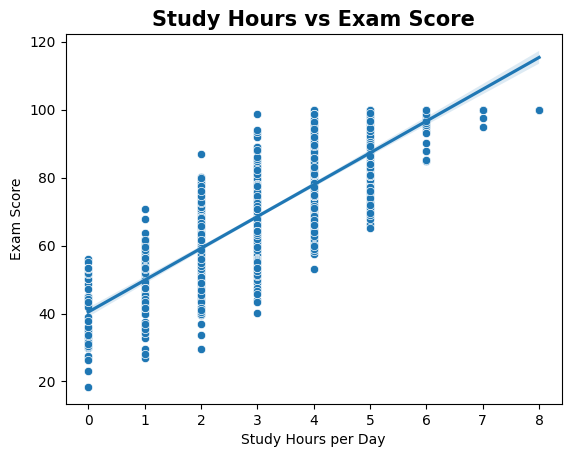

In [325]:
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
sns.regplot(data=df,x="study_hours_per_day",y="exam_score",scatter=False)
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score',weight='bold',fontsize=15)
#plt.ylim(0,100)
plt.show()

In [326]:
df[["study_hours_per_day","exam_score"]].corr() # HAY UNA FUERTE CORRELACIÓN

,study_hours_per_day,exam_score
study_hours_per_day,1.000000,0.817347
exam_score,0.817347,1.000000


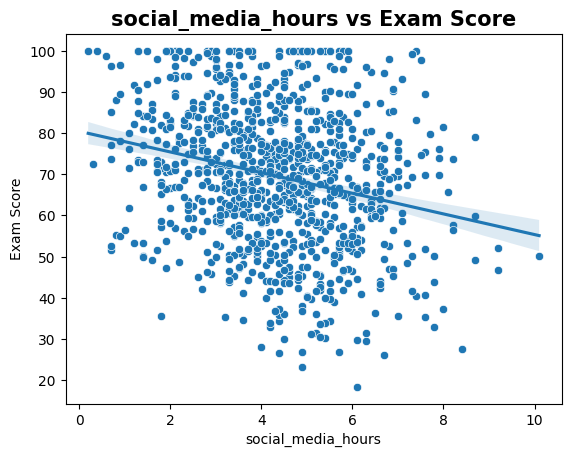

In [327]:
sns.scatterplot(x='ocio_al_dia', y='exam_score', data=df)
sns.regplot(data=df,x="ocio_al_dia",y="exam_score",scatter=False)

plt.xlabel('social_media_hours')
plt.ylabel('Exam Score')
plt.title('social_media_hours vs Exam Score',weight='bold',fontsize=15)
plt.show()

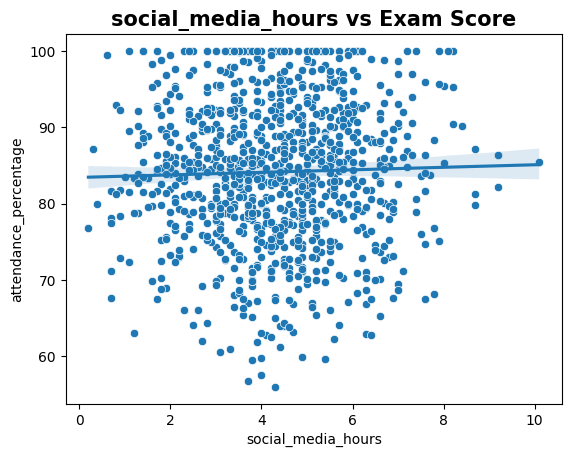

In [328]:
sns.scatterplot(x='ocio_al_dia', y='attendance_percentage', data=df)
sns.regplot(data=df,x="ocio_al_dia",y="attendance_percentage",scatter=False)

plt.xlabel('social_media_hours')
plt.ylabel('attendance_percentage')
plt.title('social_media_hours vs Exam Score',weight='bold',fontsize=15)
plt.show()

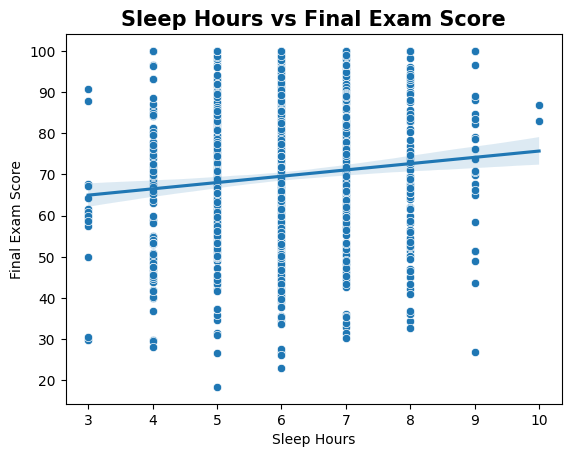

In [329]:
sns.scatterplot(x='sleep_hours', y='exam_score', data = df)
sns.regplot(data=df,x="sleep_hours",y="exam_score",scatter=False)

plt.title('Sleep Hours vs Final Exam Score', weight = "bold",fontsize=15)
plt.xlabel('Sleep Hours')
plt.ylabel('Final Exam Score')
plt.show()

In [332]:
df_numeric = df.drop(["gender", "diet_quality"], axis=1)

In [384]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [333]:
for i, j in enumerate(df_numeric):
    print(i)
    print(j)

0
age
1
study_hours_per_day
2
part_time_job
3
attendance_percentage
4
sleep_hours
5
exercise_frequency
6
mental_health_rating
7
exam_score
8
ocio_al_dia
9
Aprobar
10
Rango_notas


In [334]:
columns = []
for i in df_numeric.drop("exam_score", axis=1):
    columns.append(i)

len(columns)

10

ValueError: could not convert string to float: 'No'

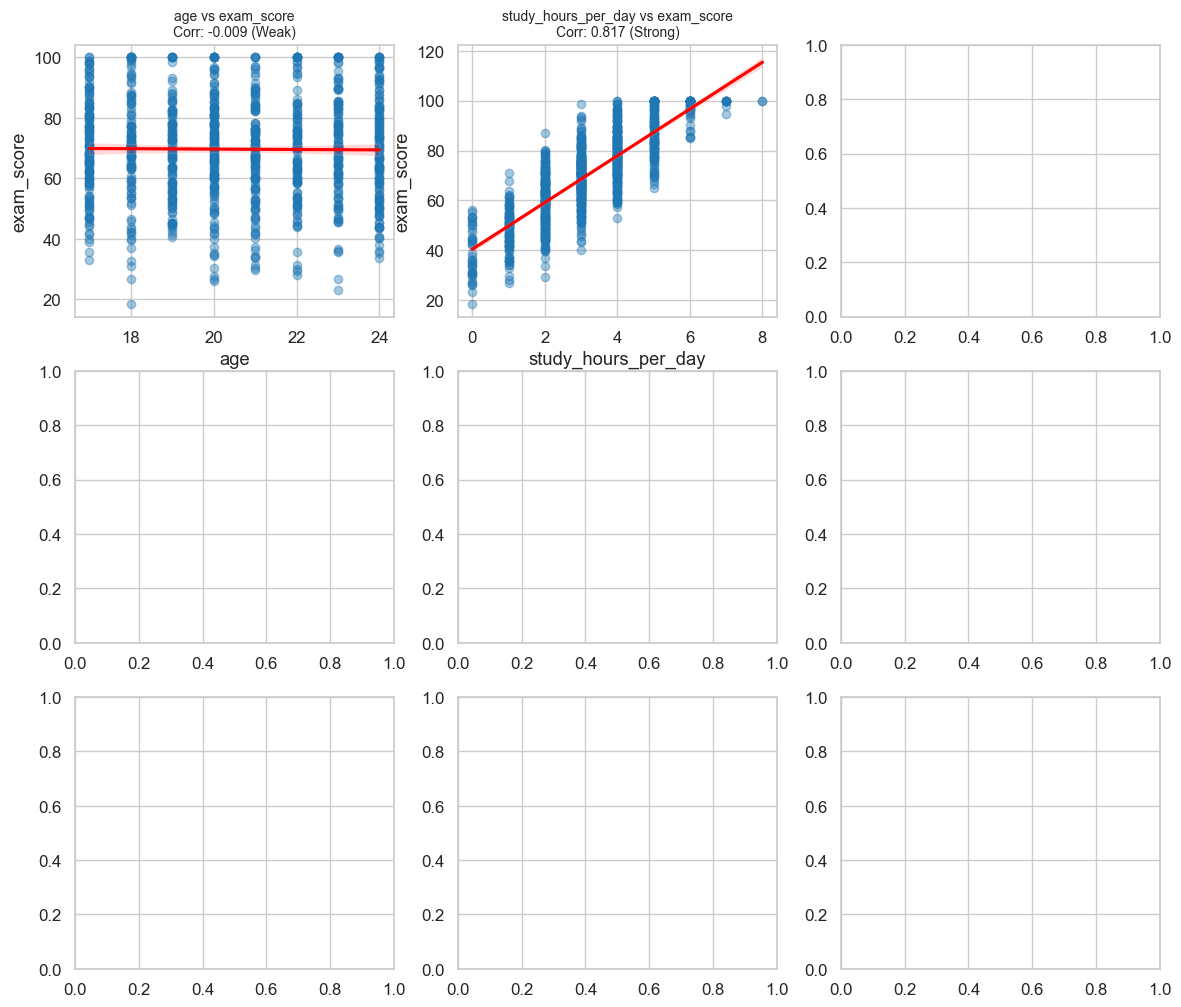

In [336]:
# Estructura de la gráfica
sns.set(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

# hacer cada gráfico
for i, var in enumerate(columns):
    corr = df[var].corr(df['exam_score'])
    sns.regplot(
        data=df,
        x=var, y='exam_score',
        ax=axes[i],
        scatter_kws={'alpha': 0.4, 'color': 'tab:blue'},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f"{var} vs exam_score\nCorr: {corr:.3f} {'(Strong)' if abs(corr)>0.5 else '(Weak)'}", fontsize=10)

# Ajusto y muestro
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numeric Variables vs Exam Score - Relationship Analysis", fontsize=14, y=1.02)
plt.show()

In [ ]:
corre = df.drop(["gender", "part_time_job", "diet_quality", "parental_education_level", "internet_quality", "extracurricular_participation"], axis=1)

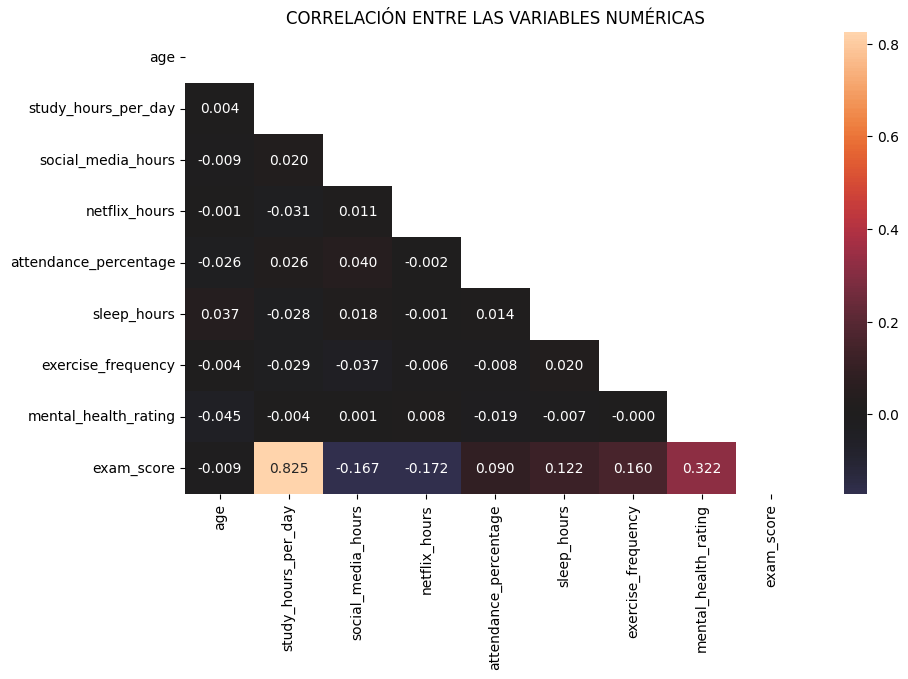

In [ ]:
plt.figure(figsize=(10, 6)) 

corr = corre.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask ,annot=True, center=0, fmt='.3f')

#plt.xticks(rotation = 80)
plt.title("CORRELACIÓN ENTRE LAS VARIABLES NUMÉRICAS")
plt.show()

In [ ]:
ranking_corr = corr.sort_values(by = "exam_score", ascending=False)
ranking_corr.drop("exam_score", axis=0, inplace=True)

top_3 = ranking_corr.exam_score.head(3).index

print("🔍 Correlation Insights:")

print(f"\n📈 Top 3 Strongest Positive Correlations with exam_score:")
for i in top_3:
    print(f"• {i}: {ranking_corr['exam_score'].loc[i]:.3f}")

top_3_d = reversed(ranking_corr.exam_score.tail(3).index)

print(f"\n📉 Top 3 Strongest Negative Correlations with exam_score:")
for i in top_3_d:
    print(f"• {i}: {ranking_corr['exam_score'].loc[i]:.3f}")



🔍 Correlation Insights:

📈 Top 3 Strongest Positive Correlations with exam_score:
• study_hours_per_day: 0.825
• mental_health_rating: 0.322
• exercise_frequency: 0.160

📉 Top 3 Strongest Negative Correlations with exam_score:
• netflix_hours: -0.172
• social_media_hours: -0.167
• age: -0.009


# GRÁFICO DE DIFERENTES COLUMS

In [ ]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Aprobar,Rango_notas,Rango_attendance_percentage
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,True,Bien,Mucho
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,True,Sobresaliente,Mucho
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,False,Suspenso,Mucho
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,False,Suspenso,Poco
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,True,Bien,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,True,Notable,Poco
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,True,Bien,Mucho
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,True,Bien,Poco
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,True,Bien,Mucho


In [ ]:
df

,age,gender,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,exam_score,ocio_al_dia,Rango_notas
student_id,,,,,,,,,,,,
S1000,23,Female,0.0,85.0,8.0,Fair,6,Master,8,56.2,2.3,Bien
S1001,20,Female,6.9,97.3,4.6,Good,6,High School,8,100.0,5.1,Sobresaliente
S1002,21,Male,1.4,94.8,8.0,Poor,1,High School,1,34.3,4.4,Suspenso
S1003,23,Female,1.0,71.0,9.2,Poor,4,Master,1,26.8,4.9,Suspenso
S1004,19,Female,5.0,90.9,4.9,Fair,3,Master,1,66.4,4.9,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,77.0,7.5,Fair,2,High School,6,76.1,2.1,Notable
S1996,17,Female,2.9,86.0,6.8,Poor,1,High School,6,65.9,3.4,Bien
S1997,20,Male,3.0,61.9,6.5,Good,5,Bachelor,9,64.4,3.9,Bien


# CATEGORICA Y TENGO QUE COMPARARLA POR SEPARADO CON EXAM_SCORE

In [ ]:
df_cate = df.drop(["age", "study_hours_per_day", "attendance_percentage", "sleep_hours", "exercise_frequency","mental_health_rating"], axis=1)
df_cate

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,exam_score,ocio_al_dia
student_id,,,,,,,,
S1000,Female,No,Fair,Master,Average,Yes,56.2,2.3
S1001,Female,No,Good,High School,Average,No,100.0,5.1
S1002,Male,No,Poor,High School,Poor,No,34.3,4.4
S1003,Female,No,Poor,Master,Good,Yes,26.8,4.9
S1004,Female,No,Fair,Master,Good,No,66.4,4.9
...,...,...,...,...,...,...,...,...
S1995,Female,No,Fair,High School,Good,Yes,76.1,2.1
S1996,Female,Yes,Poor,High School,Average,Yes,65.9,3.4
S1997,Male,No,Good,Bachelor,Good,Yes,64.4,3.9


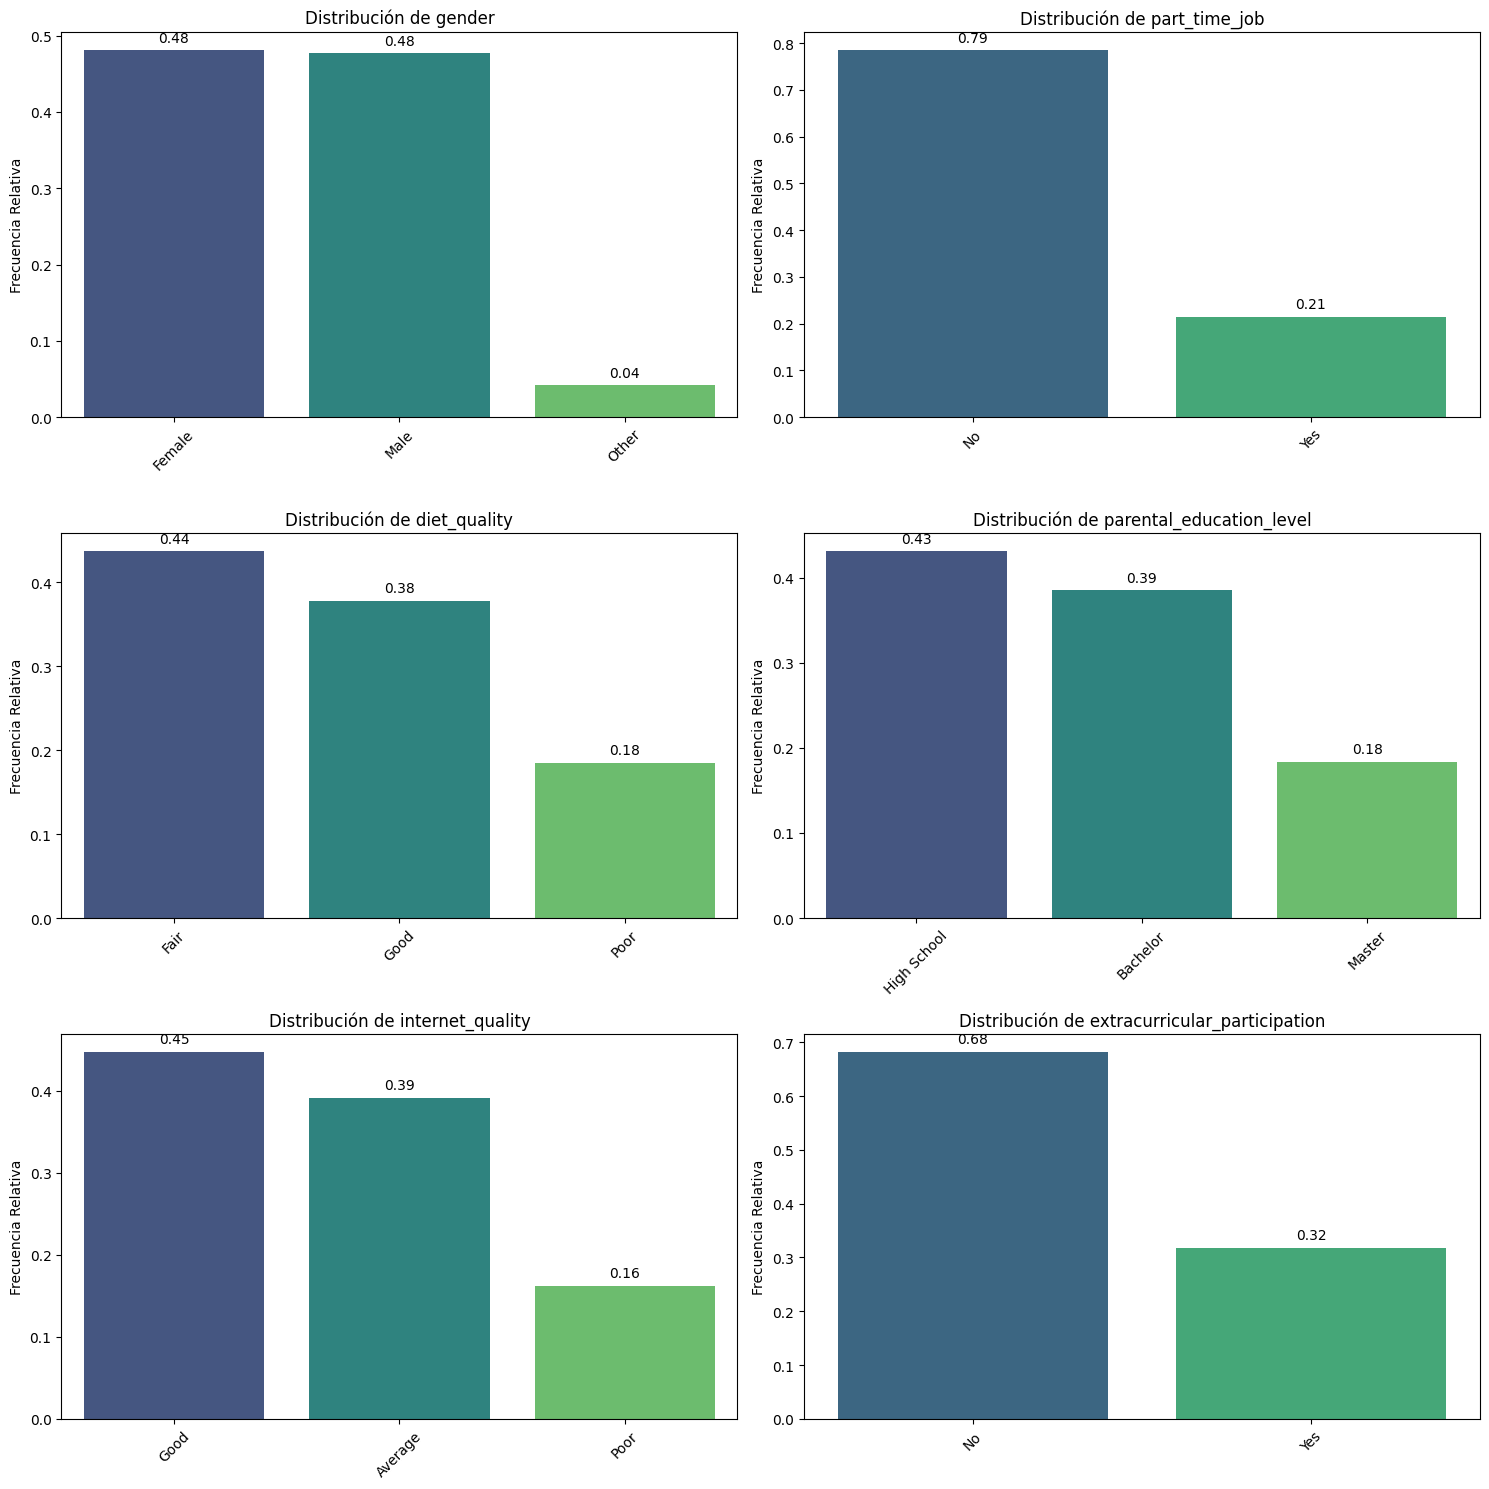

In [ ]:
pinta_distribucion_categoricas(df_cate, ["gender",	"part_time_job",	"diet_quality",	"parental_education_level",	"internet_quality",	"extracurricular_participation"], relativa=True, mostrar_valores=True )

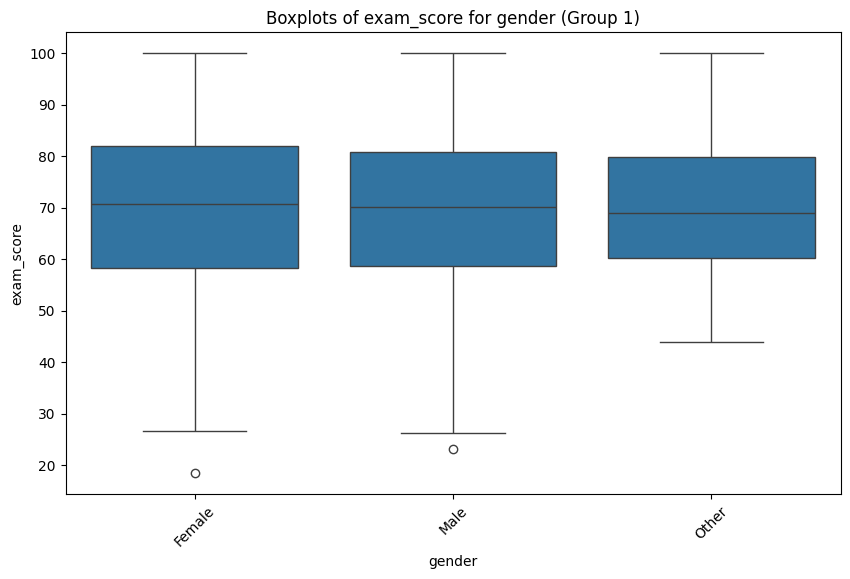

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="gender", num_col="exam_score")

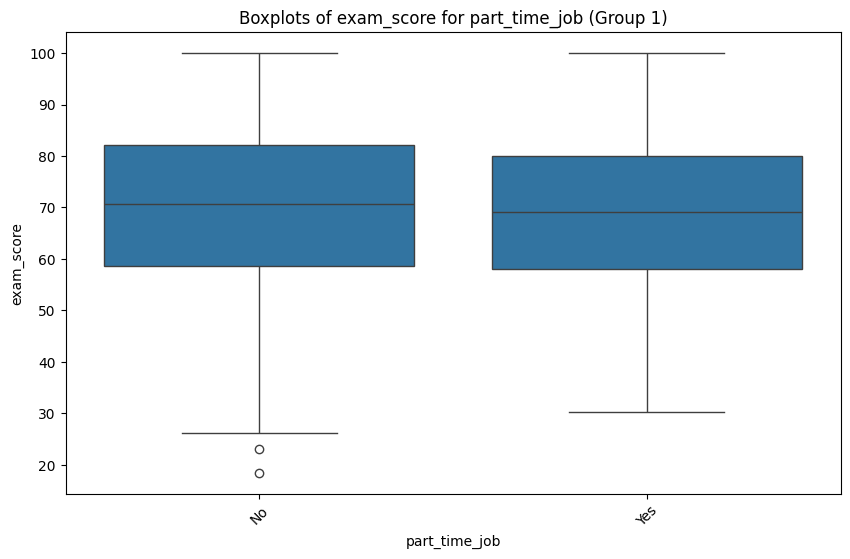

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="part_time_job", num_col="exam_score")

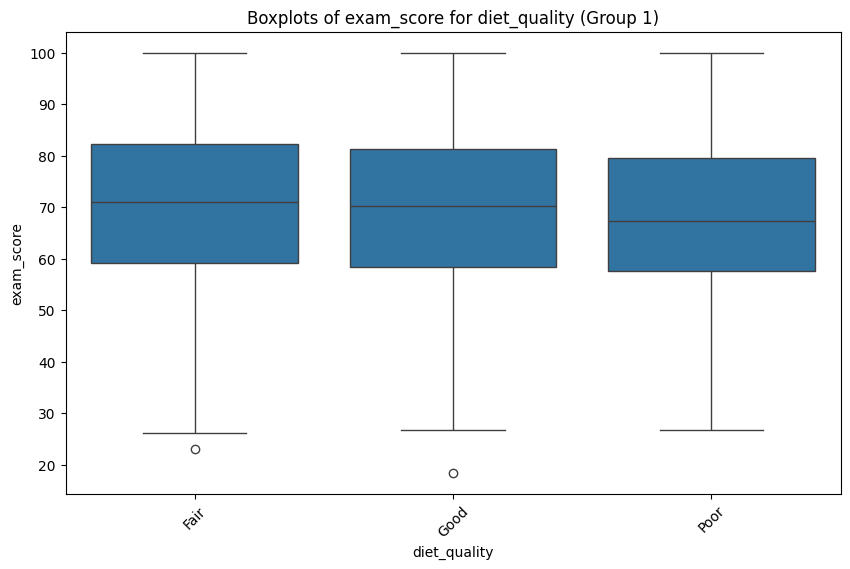

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="diet_quality", num_col="exam_score")

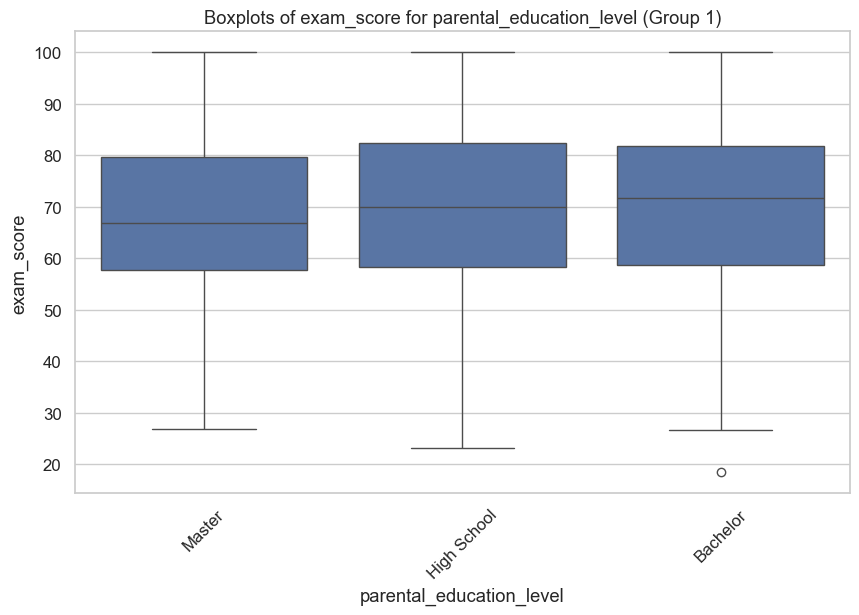

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="parental_education_level", num_col="exam_score")

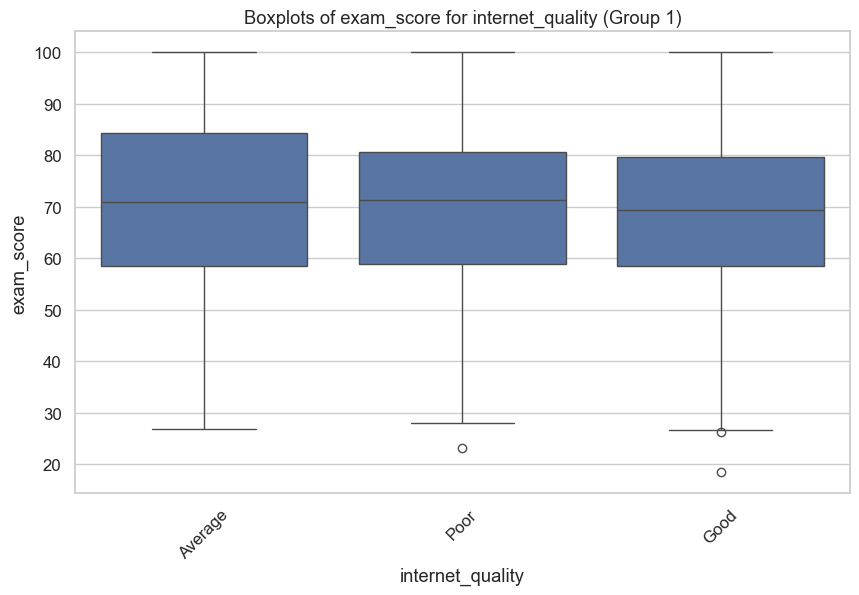

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="internet_quality", num_col="exam_score")

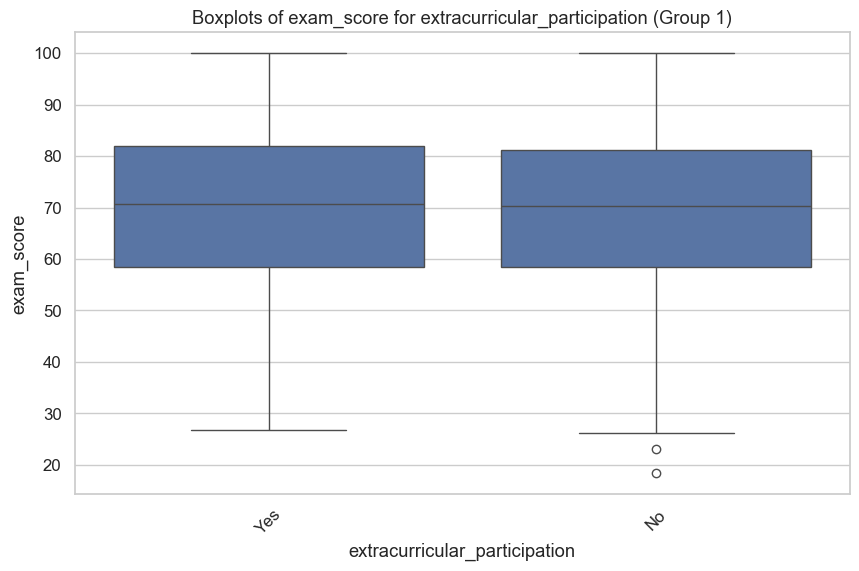

In [ ]:
#plot_grouped_boxplots(df_cate, cat_col="extracurricular_participation", num_col="exam_score")

In [ ]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,ocio_al_dia
student_id,,,,,,,,,,,,,,
S1000,23,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3
S1001,20,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1
S1002,21,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4
S1003,23,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9
S1004,19,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,2.1
S1996,17,Female,2.9,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,3.4
S1997,20,Male,3.0,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,3.9


# LOS DATOS CATEGORICOS NO ME MUESTRAN NADA RELEVANTE, ME QUEDARÉ SOLO CON LOS NUMÉRICOS

# ME CENTRARÉ EN LAS 3 MÁS IMPORTANTES

(4, 2)


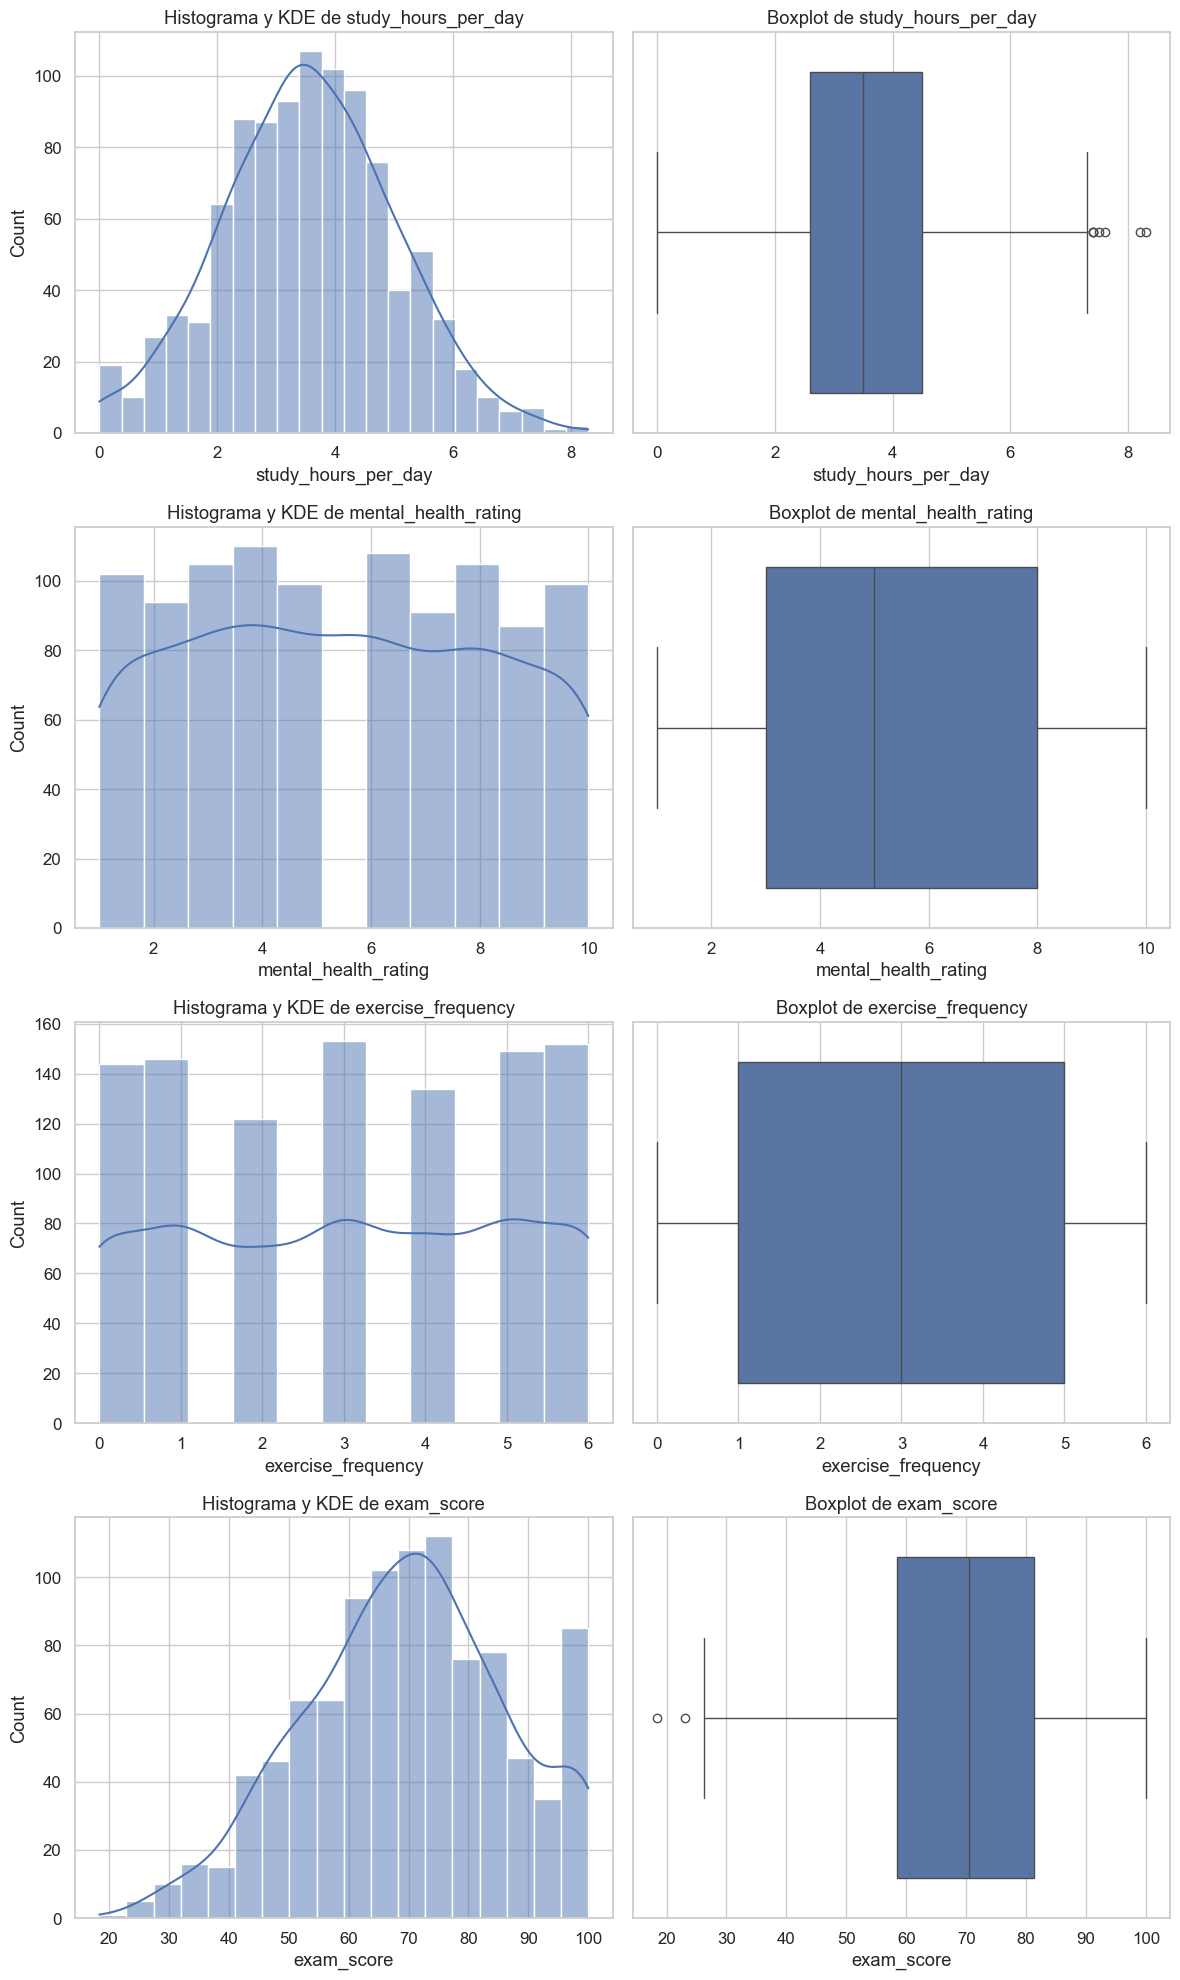

In [ ]:
plot_combined_graphs(df, columns=["study_hours_per_day", "mental_health_rating", "exercise_frequency", "exam_score"])

In [ ]:
# CREAR AGRUPACIONES EN ["study_hours_per_day", "mental_health_rating", "exercise_frequency"]

In [ ]:
rangos = [0, 50, 70, 90, 100]
etiquetas = ["Suspenso", "Bien", "Notable", "Sobresaliente"]
df_numeric['Rango_notas'] = pd.cut(df['exam_score'], bins=rangos, labels=etiquetas, include_lowest=True)

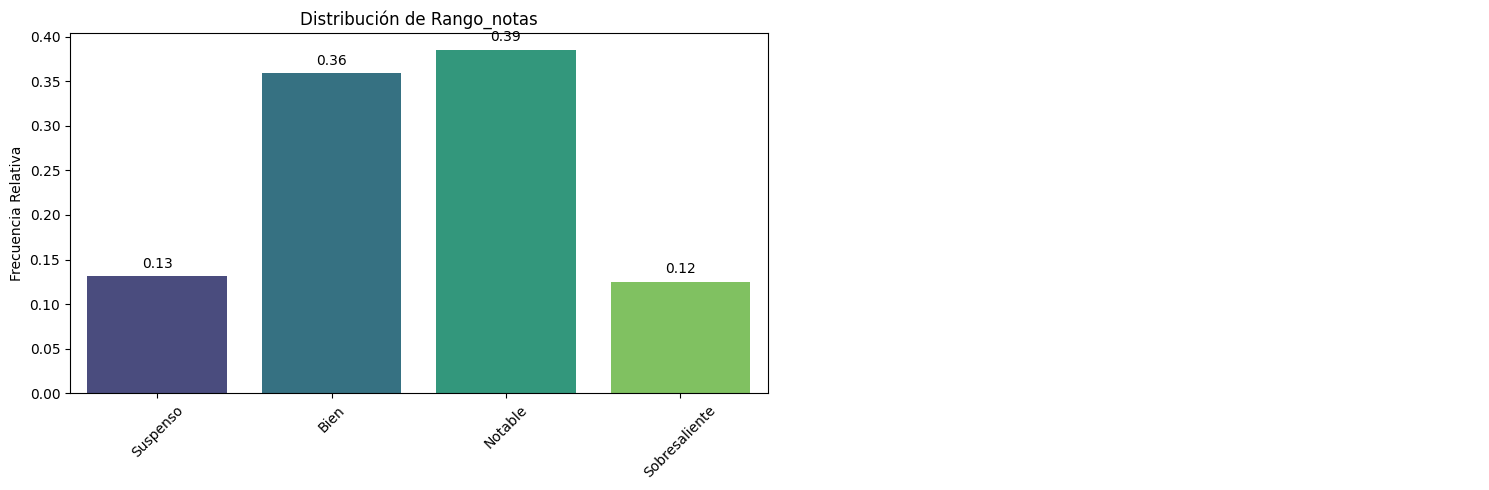

In [ ]:
pinta_distribucion_categoricas(df_numeric, ['Rango_notas'], relativa=True, mostrar_valores=True)
# La gran mayoria saca notables, seguido de los que sacan un bien, los que suspenden y sacan sobresaliente tienen casi el mismo porcentaje

In [ ]:
# COMPARACIONES POR HORAS DE ESTUDIO

In [ ]:
df_numeric

,student_id,age,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Rango_notas
0,S1000,23,0.0,No,85.0,8.0,6,Average,8,Yes,56.2,Bien
1,S1001,20,6.9,No,97.3,4.6,6,Average,8,No,100.0,Sobresaliente
2,S1002,21,1.4,No,94.8,8.0,1,Poor,1,No,34.3,Suspenso
3,S1003,23,1.0,No,71.0,9.2,4,Good,1,Yes,26.8,Suspenso
4,S1004,19,5.0,No,90.9,4.9,3,Good,1,No,66.4,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,2.6,No,77.0,7.5,2,Good,6,Yes,76.1,Notable
996,S1996,17,2.9,Yes,86.0,6.8,1,Average,6,Yes,65.9,Bien
997,S1997,20,3.0,No,61.9,6.5,5,Good,9,Yes,64.4,Bien
998,S1998,24,5.4,Yes,100.0,7.6,0,Average,1,No,69.7,Bien


In [ ]:
rangos = [0, 3, 6, 9]
etiquetas = ["0-2", "3-5", "6-9"]
df_numeric['Horas_de_estudio_al_día'] = pd.cut(df['study_hours_per_day'], bins=rangos, labels=etiquetas, include_lowest=True)

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


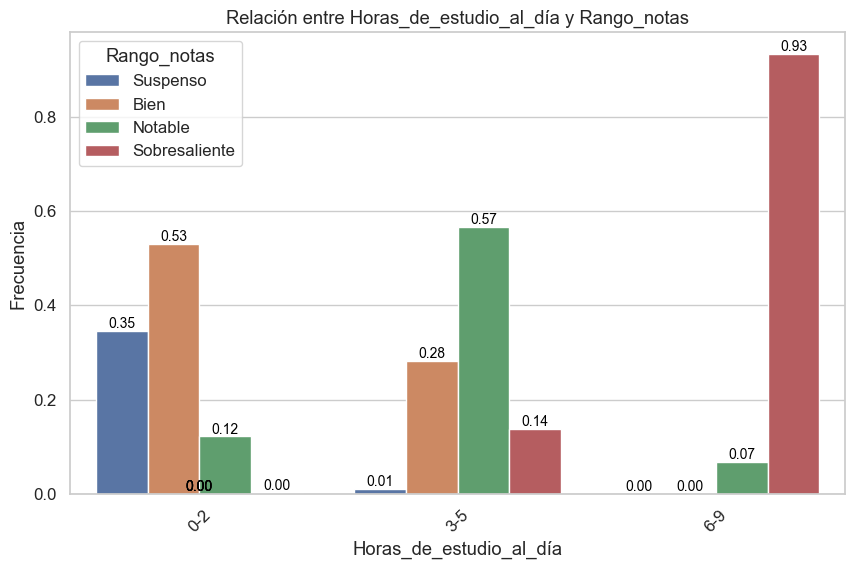

In [ ]:
plot_categorical_relationship_fin(df_numeric, "Horas_de_estudio_al_día", "Rango_notas", relative_freq=True, show_values=True, size_group=5)
#plot_categorical_relationship_fin(df_numeric, "Horas_de_estudio_al_día", "Rango_notas", relative_freq=False, show_values=True , size_group=5)

In [ ]:
df_numeric

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Rango_notas,Horas_de_estudio_al_día,Rango_salud_mental,Rango_actividad_fisica_a_la_semana
student_id,,,,,,,,,,,,,,,,
S1000,23,0.0,1.2,1.1,No,85.0,8.0,6,Average,8,Yes,56.2,Bien,0-2,medio-alto,5-6
S1001,20,6.9,2.8,2.3,No,97.3,4.6,6,Average,8,No,100.0,Sobresaliente,6-9,medio-alto,5-6
S1002,21,1.4,3.1,1.3,No,94.8,8.0,1,Poor,1,No,34.3,Suspenso,0-2,bajo,0-2
S1003,23,1.0,3.9,1.0,No,71.0,9.2,4,Good,1,Yes,26.8,Suspenso,0-2,bajo,3-4
S1004,19,5.0,4.4,0.5,No,90.9,4.9,3,Good,1,No,66.4,Bien,3-5,bajo,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,2.6,0.5,1.6,No,77.0,7.5,2,Good,6,Yes,76.1,Notable,0-2,medio-alto,0-2
S1996,17,2.9,1.0,2.4,Yes,86.0,6.8,1,Average,6,Yes,65.9,Bien,0-2,medio-alto,0-2
S1997,20,3.0,2.6,1.3,No,61.9,6.5,5,Good,9,Yes,64.4,Bien,0-2,alto,3-4


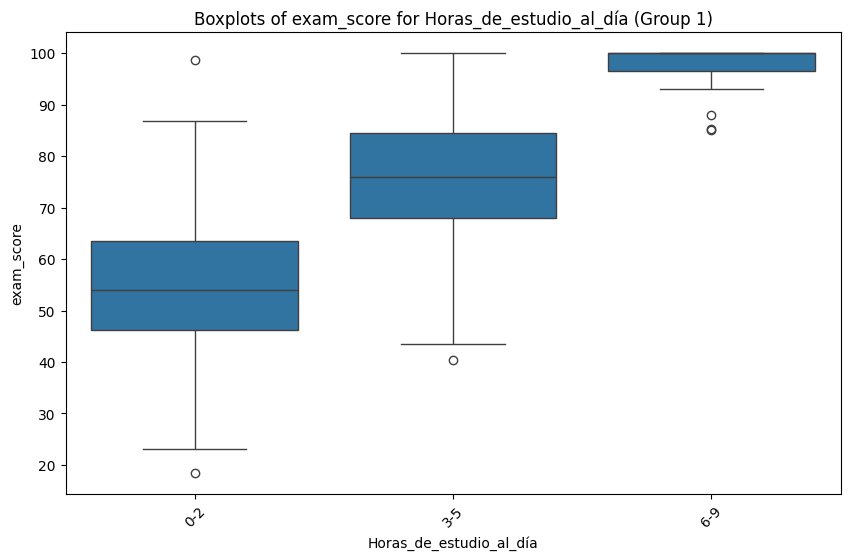

In [ ]:
plot_grouped_boxplots(df_numeric, cat_col="Horas_de_estudio_al_día", num_col="exam_score")
# Puedo ver que hay outliers
# En el grupo de gente que estudia entre 0-2h, lo normal es suspender o llegar al bien, pero hay quienes sacan sobresaliente
# Los que estudian 3-5, tiene a sacar entre bien y notable, aunque también se puede suspender o sobresaliente, veremos cómo optimizar esta opcion más adelante
# Los que estudian entre 6-9 horas, tieneden a sacar sobresaliente, pero hay outliers de notables.


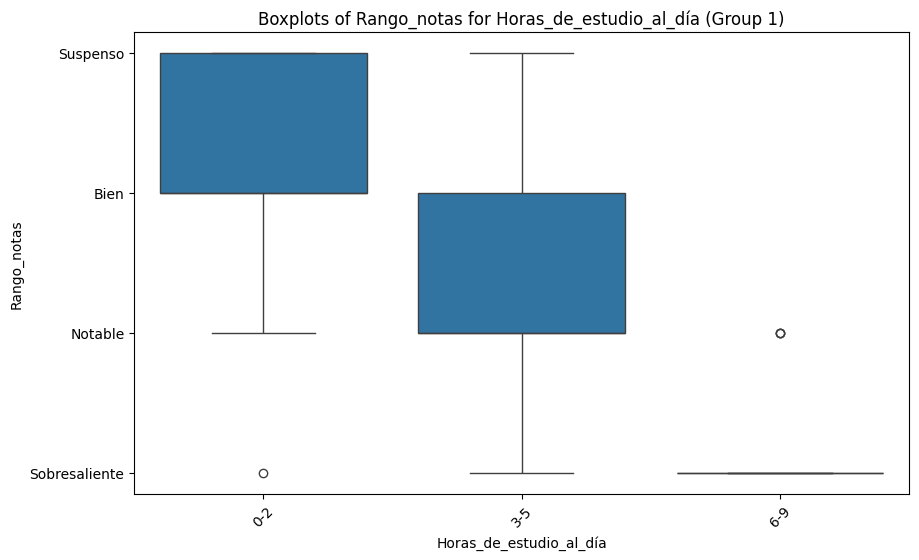

In [ ]:
plot_grouped_boxplots(df_numeric, cat_col="Horas_de_estudio_al_día", num_col="Rango_notas")

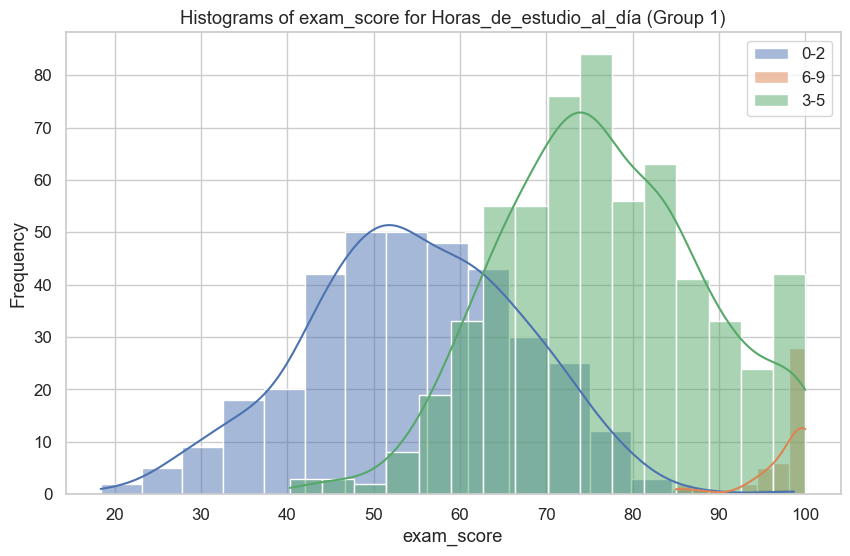

In [ ]:
plot_grouped_histograms(df_numeric, cat_col="Horas_de_estudio_al_día", num_col="exam_score", group_size=3)
# Aquí podemos ver como la gente tiende dedicar 3-5 horas a estudiar, 
# mientras que son menos los que le dedican más de 6

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_numeric['Horas_de_estudio_al_día'], df_numeric['exam_score'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1233.9120912784408
P-Value: 3.3543443703745772e-09
Grados de Libertad: 958
Tabla de Frecuencias Esperadas:
 [[ 0.359  0.359  0.359 ...  0.359  0.359 17.232]
 [ 0.597  0.597  0.597 ...  0.597  0.597 28.656]
 [ 0.044  0.044  0.044 ...  0.044  0.044  2.112]]


*El p-value es claramente bajísimo y nos dice que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables, es decir que cuanto más estudias a mejor nota puedes aspirar.*

In [ ]:
df.mental_health_rating.min() # 1
df.mental_health_rating.max() # 10

np.int64(10)

In [ ]:
df.mental_health_rating.value_counts().sort_index() # La frecuencia de cada voto

mental_health_rating
1     102
2      94
3     105
4     110
5      99
6     108
7      91
8     105
9      87
10     99
Name: count, dtype: int64

In [ ]:
rangos = [1, 3, 5, 8, 10]
etiquetas = ["bajo", "medio-bajo", "medio-alto", "alto"]
df_numeric['Rango_salud_mental'] = pd.cut(df['mental_health_rating'], bins=rangos, labels=etiquetas, include_lowest=True)

In [ ]:
df_numeric

,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,ocio_al_dia,Rango_notas,Rango_salud_mental,Horas_de_estudio_al_día,Rango_actividad_fisica_a_la_semana
student_id,,,,,,,,,,,,
S1000,23,0.0,85.0,8.0,6,medio-alto,56.2,2.3,Bien,NaN,0-2,NaN
S1001,20,6.9,97.3,4.6,6,medio-alto,100.0,5.1,Sobresaliente,NaN,6-9,NaN
S1002,21,1.4,94.8,8.0,1,bajo,34.3,4.4,Suspenso,0-2,0-2,0-2
S1003,23,1.0,71.0,9.2,4,bajo,26.8,4.9,Suspenso,0-2,0-2,0-2
S1004,19,5.0,90.9,4.9,3,bajo,66.4,4.9,Bien,0-2,3-5,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,2.6,77.0,7.5,2,medio-alto,76.1,2.1,Notable,5-6,0-2,5-6
S1996,17,2.9,86.0,6.8,1,medio-alto,65.9,3.4,Bien,5-6,0-2,5-6
S1997,20,3.0,61.9,6.5,5,alto,64.4,3.9,Bien,NaN,0-2,NaN


/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


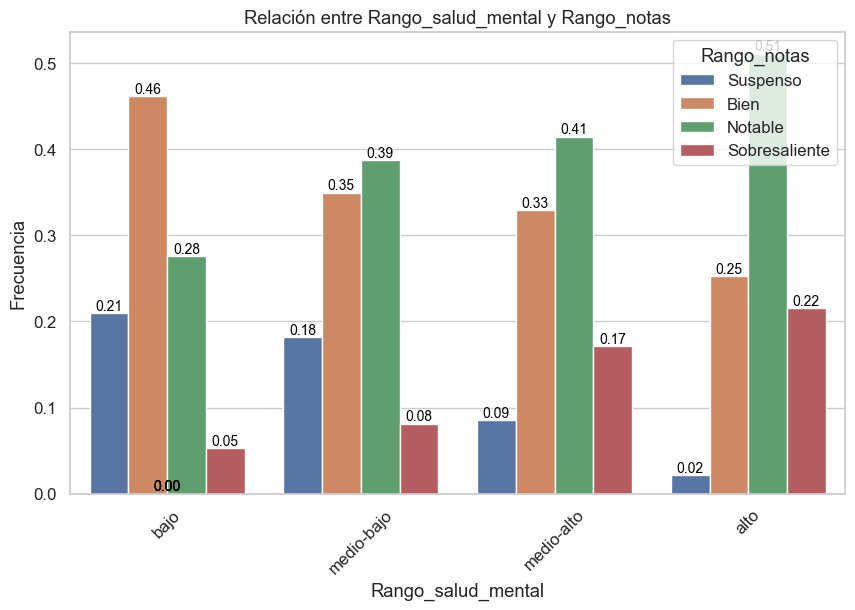

In [ ]:
plot_categorical_relationship_fin(df_numeric, "Rango_salud_mental", "Rango_notas", relative_freq=True, show_values=True, size_group=5)
#plot_categorical_relationship_fin(df_numeric, "Rango_salud_mental", "Rango_notas", relative_freq=False, show_values=True , size_group=5)

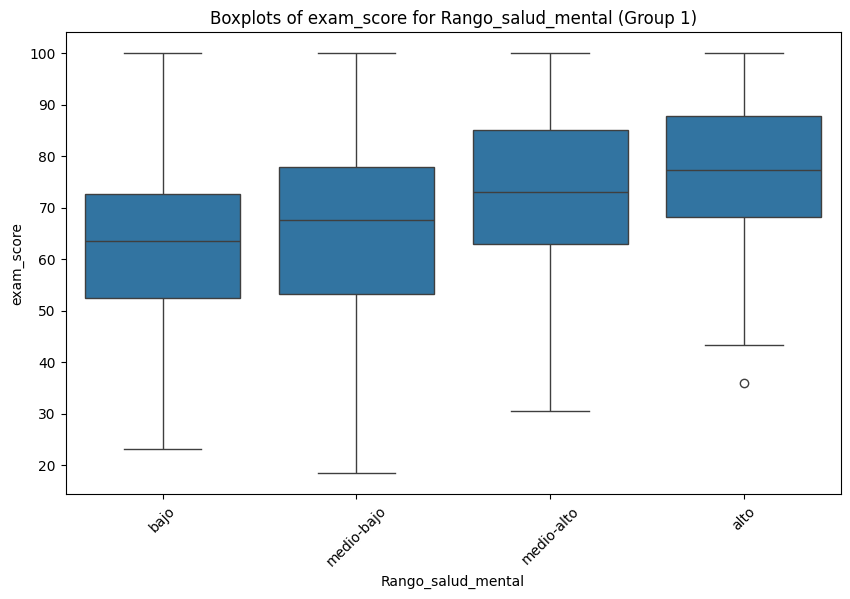

In [ ]:
plot_grouped_boxplots(df_numeric, cat_col="Rango_salud_mental", num_col="exam_score")

In [ ]:
# En este caso se ve que no no hay una gran correlación y lo refuto con la siguiente gráfica

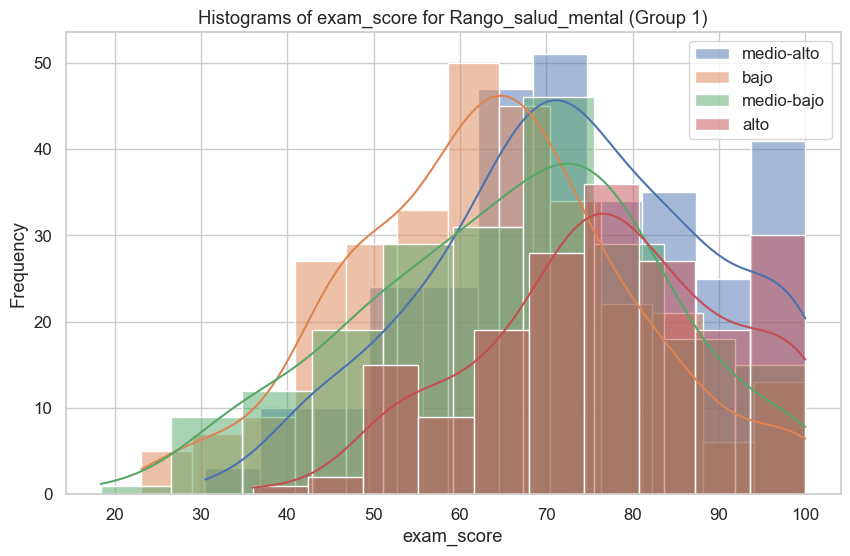

In [ ]:
plot_grouped_histograms(df_numeric, cat_col="Rango_salud_mental", num_col="exam_score", group_size=4)
# En esta gráfica se ve como todos los grupos tienden a la misma nota.

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_numeric['Rango_salud_mental'], df_numeric['exam_score'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1458.7547843186587
P-Value: 0.33863554071990176
Grados de Libertad: 1437
Tabla de Frecuencias Esperadas:
 [[ 0.301  0.301  0.301 ...  0.301  0.301 14.448]
 [ 0.209  0.209  0.209 ...  0.209  0.209 10.032]
 [ 0.304  0.304  0.304 ...  0.304  0.304 14.592]
 [ 0.186  0.186  0.186 ...  0.186  0.186  8.928]]


*A diferencia del anterior, aquí el p-value supera mi alpha(5%), así que tengo que no puedo no rechzar la Hipotesis nula, viendo que la relación entre la salud mental y la nota que sacas no es tan clara.*

In [ ]:
# CREAR AGRUPACIONES EN "exercise_frequency"

In [ ]:
df_numeric.exercise_frequency.min() # 0
df_numeric.exercise_frequency.max() # 6

np.int64(6)

In [ ]:
rangos = [0, 3, 5, 6]
etiquetas = ["0-2", "3-4", "5-6"]
df_numeric['Rango_actividad_fisica_a_la_semana'] = pd.cut(df['exercise_frequency'], bins=rangos, labels=etiquetas, include_lowest=True)

In [383]:
#plot_categorical_relationship_fin(df_numeric, "Rango_actividad_fisica_a_la_semana", "Rango_notas", relative_freq=True, show_values=True, size_group=5)
plot_categorical_relationship_fin(df_numeric, "Rango_actividad_fisica_a_la_semana", "Rango_notas", relative_freq=False, show_values=True , size_group=5)

KeyError: 'Rango_actividad_fisica_a_la_semana'

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_numeric['Rango_actividad_fisica_a_la_semana'], df_numeric['exam_score'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 898.2678972204583
P-Value: 0.916012994976025
Grados de Libertad: 958
Tabla de Frecuencias Esperadas:
 [[ 0.565  0.565  0.565 ...  0.565  0.565 27.12 ]
 [ 0.283  0.283  0.283 ...  0.283  0.283 13.584]
 [ 0.152  0.152  0.152 ...  0.152  0.152  7.296]]


*A diferencia del anterior, aquí el p-value supera mi alpha(5%), así que tengo que no puedo no rechzar la Hipotesis nula, viendo que la relación entre la actividad física semanal y la nota uqe sacas no es tan clara.*

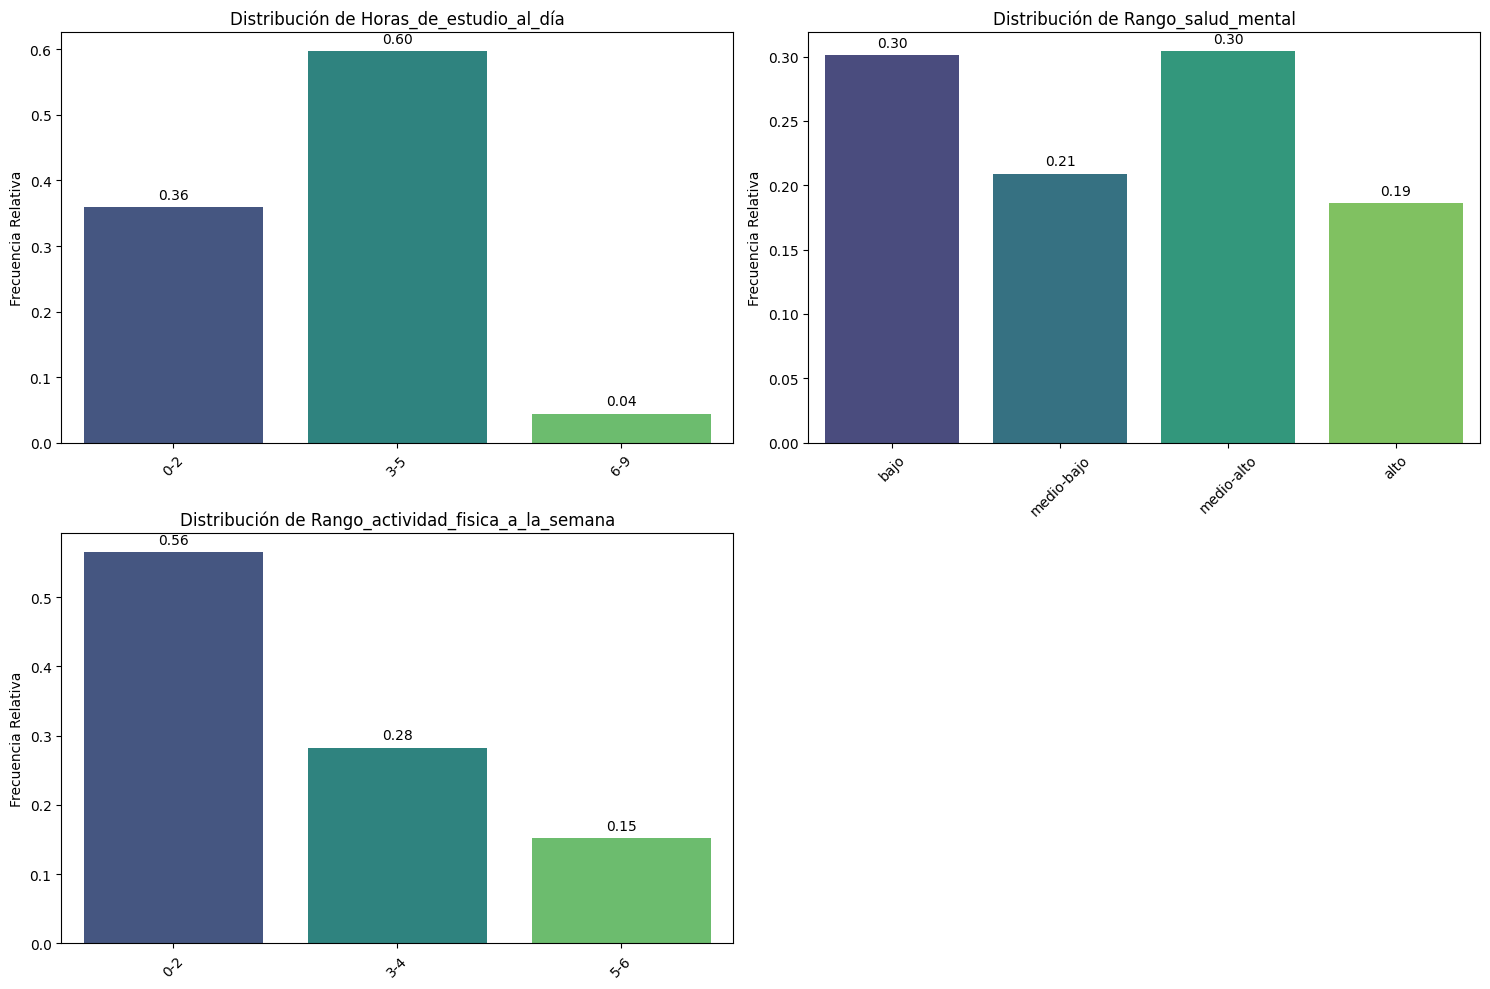

In [ ]:
pinta_distribucion_categoricas(df_numeric, ["Horas_de_estudio_al_día",	"Rango_salud_mental",	"Rango_actividad_fisica_a_la_semana"], relativa=True, mostrar_valores=True )
# Son muy pocos los que estudian entre 6-9 horas
# Bajo y medio-alto en la salud mental es la distribución que más se repite
# La gente tiende a hacer de 0-2 días de ejer a la semana

# LO SIGUIENTE ES VER CÓMO AFECTA A LA NOTA LO NEGATIVO

In [ ]:
#ocio_al_dia, age

In [ ]:
df_numeric["ocio_al_dia"] = df_numeric.ocio_al_dia.astype(int)

In [ ]:
df_numeric.ocio_al_dia.min()# 0
df_numeric.ocio_al_dia.max()# 10

np.int64(10)

In [ ]:
rangos = [0, 4, 8, 10]
etiquetas = ["0-3", "4-7", "8-10"]
df_numeric['Rango_ocio_al_dia'] = pd.cut(df_numeric['ocio_al_dia'], bins=rangos, labels=etiquetas, include_lowest=True)

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


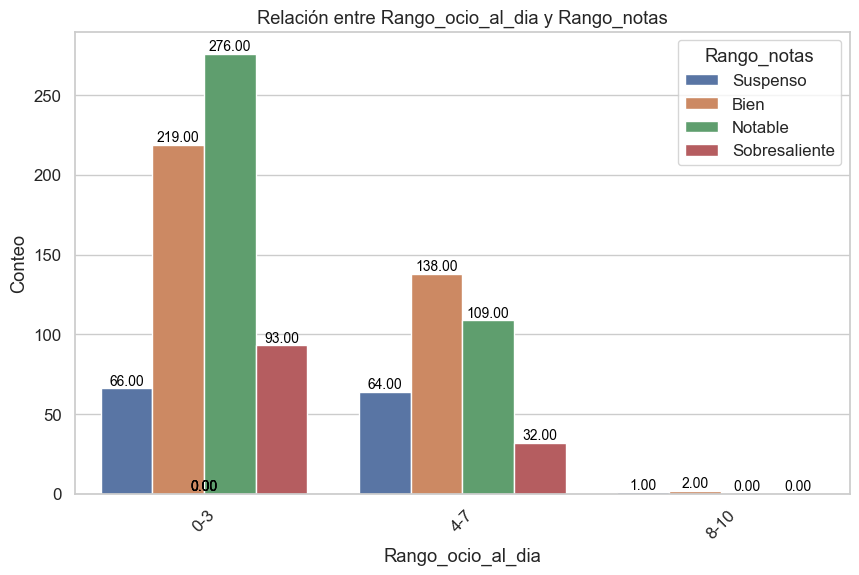

In [ ]:
plot_categorical_relationship_fin(df_numeric, "Rango_ocio_al_dia", "Rango_notas", relative_freq=False, show_values=True, size_group=5)

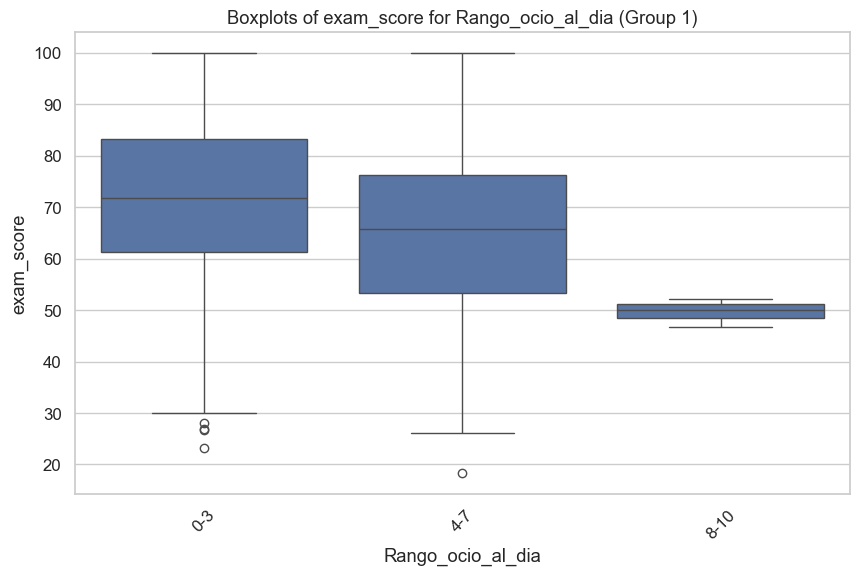

In [ ]:
plot_grouped_boxplots(df_numeric, cat_col="Rango_ocio_al_dia", num_col="exam_score")

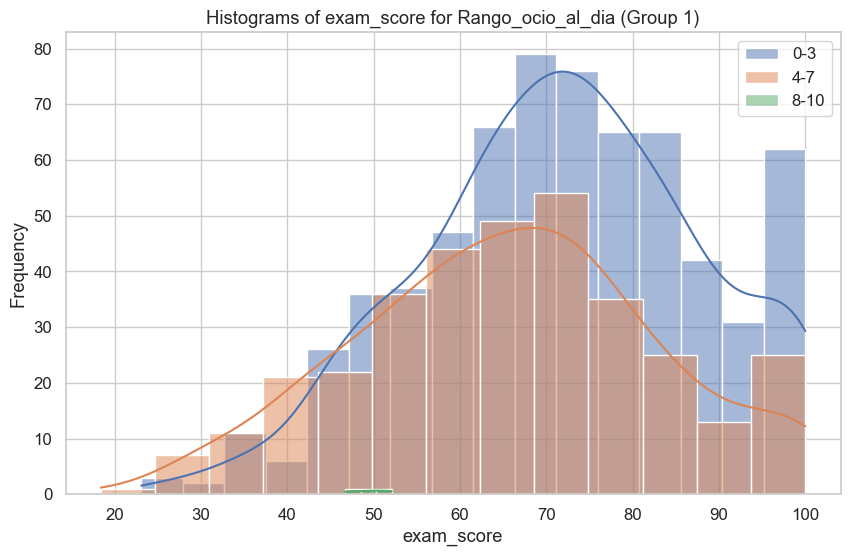

In [ ]:
plot_grouped_histograms(df_numeric, cat_col="Rango_ocio_al_dia", num_col="exam_score", group_size=4)

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_numeric['Rango_ocio_al_dia'], df_numeric['exam_score'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 914.6744518190474
P-Value: 0.8388727842848592
Grados de Libertad: 958
Tabla de Frecuencias Esperadas:
 [[6.5400e-01 6.5400e-01 6.5400e-01 ... 6.5400e-01 6.5400e-01 3.1392e+01]
 [3.4300e-01 3.4300e-01 3.4300e-01 ... 3.4300e-01 3.4300e-01 1.6464e+01]
 [3.0000e-03 3.0000e-03 3.0000e-03 ... 3.0000e-03 3.0000e-03 1.4400e-01]]


In [ ]:
df_numeric["study_hours_per_day"] = df_numeric.study_hours_per_day.astype(int)

In [ ]:
df_numeric

,age,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,ocio_al_dia,Aprobar,Rango_notas,Rango_attendance_percentage
student_id,,,,,,,,,,,,,,
S1000,23,0,No,85.0,8,6,Average,8,Yes,56.2,2.3,True,Bien,Mucho
S1001,20,6,No,97.3,4,6,Average,8,No,100.0,5.1,True,Sobresaliente,Mucho
S1002,21,1,No,94.8,8,1,Poor,1,No,34.3,4.4,False,Suspenso,Mucho
S1003,23,1,No,71.0,9,4,Good,1,Yes,26.8,4.9,False,Suspenso,Poco
S1004,19,5,No,90.9,4,3,Good,1,No,66.4,4.9,True,Bien,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,2,No,77.0,7,2,Good,6,Yes,76.1,2.1,True,Notable,Poco
S1996,17,2,Yes,86.0,6,1,Average,6,Yes,65.9,3.4,True,Bien,Mucho
S1997,20,3,No,61.9,6,5,Good,9,Yes,64.4,3.9,True,Bien,Poco


# RECOMENDACIONES HORAS DE ESTUDIO

# PARA APROBAR

In [ ]:
print(df_numeric.groupby(["Aprobar"])["study_hours_per_day"].mean().astype(int).tail(1).values[0])

3


In [ ]:
horas = df_numeric.groupby(["Aprobar"])["study_hours_per_day"].mean().astype(int).values
horas
print(f"Si quieres aprobar deberías estudiar más de {horas[1]} horas diarias.")
# Si quieres aprobar lo suyo sería estudiar más de 3 horas al día

Si quieres aprobar deberías estudiar más de 3 horas diarias.


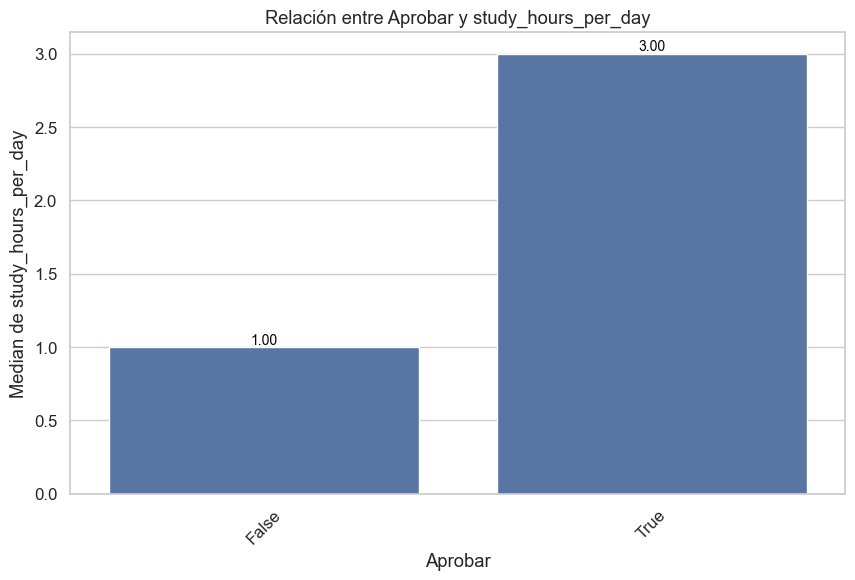

In [ ]:
plot_categorical_numerical_relationship(df_numeric, "Aprobar", "study_hours_per_day", show_values=True, measure='median')


# POR NOTA

In [ ]:
print(df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).tail(1).values[0])
# Si quieres sacar sobresaliente tienes que estudiar mínimo 5 horas al día

5


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_85077/980021012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).tail(1).values[0])


In [ ]:
notas = df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).index
horas = df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).values

for i in range(len(notas)):
    if notas[i] == "Suspenso":
        if horas[i] == 1:
            print(f"Para evitar suspender estudia más de {horas[i]} hora")
        else: 
            print(f"Para evitar suspender estudia más de {horas[i]} horas")
    else:
        print(f"Para llegar al {notas[i]} estudia más de {horas[i]} horas")

Para evitar suspender estudia más de 1 hora
Para llegar al Bien estudia más de 2 horas
Para llegar al Notable estudia más de 3 horas
Para llegar al Sobresaliente estudia más de 5 horas


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_85077/492443709.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas = df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).index
/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_85077/492443709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horas = df_numeric.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).values


/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


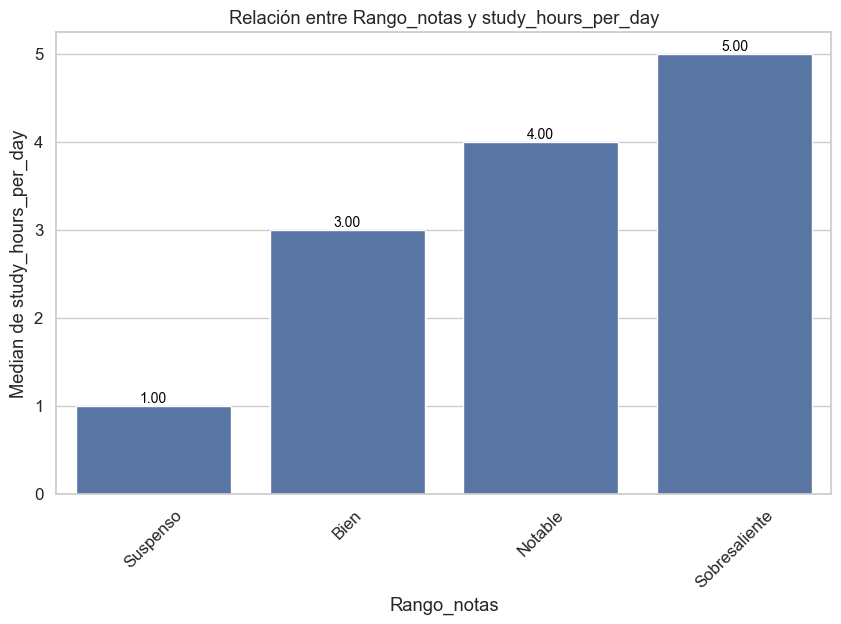

In [ ]:
plot_categorical_numerical_relationship(df_numeric, "Rango_notas", "study_hours_per_day", show_values=True, measure='median')


# RECOMENDACIONES OCIO EN EL MÓVIL

# PARA APROBAR

In [ ]:
df_numeric["ocio_al_dia"] = df_numeric.ocio_al_dia.astype(int)

In [ ]:
print(df_numeric.groupby("Aprobar")["ocio_al_dia"].mean().astype(int).tail(1).values[0])
# Para aprobar tienes que pasar menos de 3 horas al día en el móvil

3


In [ ]:
horas = df_numeric.groupby(["Aprobar"])["ocio_al_dia"].mean().astype(int).values
horas
if horas[1] == 1:
    print(f"Si quieres aprobar deberías pasar menos de {horas[1]} hora en el móvil diarias.")
else:
    print(f"Si quieres aprobar deberías pasar menos de {horas[1]} horas en el móvil diarias.")
# Si quieres aprobar lo suyo sería estudiar más de 3 horas al día
horas

Si quieres aprobar deberías pasar menos de 3 horas en el móvil diarias.


array([4, 3])

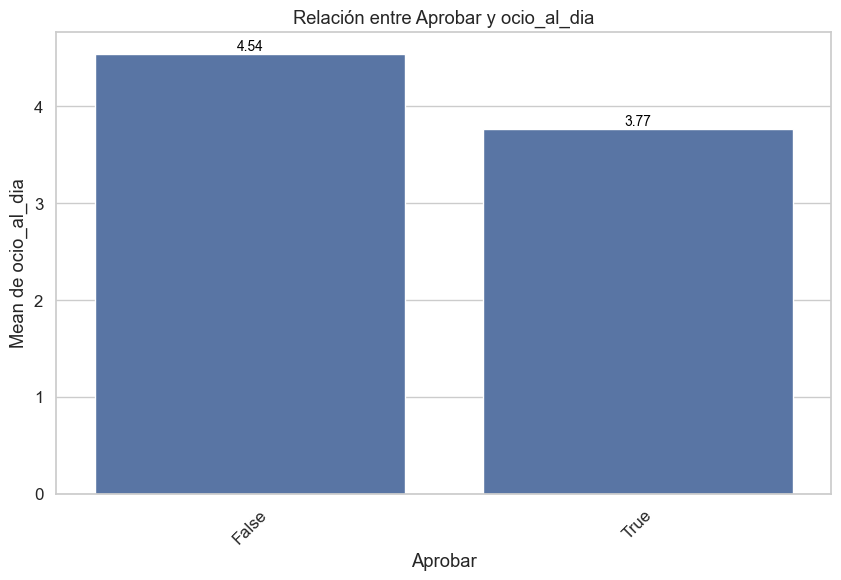

In [ ]:
plot_categorical_numerical_relationship(df_numeric, "Aprobar", "ocio_al_dia", show_values=True, measure='mean')

# POR NOTAS

In [ ]:
print(df_numeric.groupby("Rango_notas")["ocio_al_dia"].mean().astype(int).tail(1).values[0])

3


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_4888/2867491477.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_numeric.groupby("Rango_notas")["ocio_al_dia"].mean().astype(int).tail(1).values[0])


In [ ]:
notas = df_numeric.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).index
horas = df_numeric.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).values

for i in range(len(notas)):
    if notas[i] == "Suspenso":
        if horas[i] == 1:
            print(f"Para evitar suspender evita usar el móvil más de {horas[i]} hora")
        else: 
            print(f"Para evitar suspender evita usar el móvil más de {horas[i]} horas")
    else:
        print(f"Para llegar al {notas[i]} evita usar el móvil más de {horas[i]} horas")

Para evitar suspender evita usar el móvil más de 4 horas
Para llegar al Bien evita usar el móvil más de 4 horas
Para llegar al Notable evita usar el móvil más de 3 horas
Para llegar al Sobresaliente evita usar el móvil más de 3 horas


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_4888/1347900994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas = df_numeric.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).index
/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_4888/1347900994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horas = df_numeric.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).values


/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:111: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


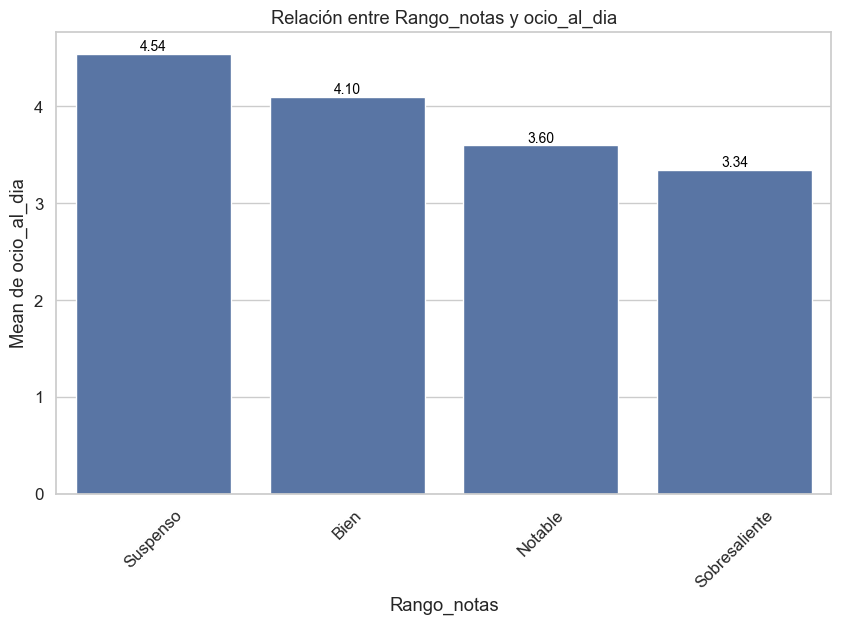

In [ ]:
plot_categorical_numerical_relationship(df_numeric, "Rango_notas", "ocio_al_dia", show_values=True, measure='mean')